In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,LeakyReLU,BatchNormalization,Conv2D,Conv2DTranspose
from tensorflow.keras.layers import Dropout,Flatten
import os
from PIL import Image
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from keras import models

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Found 1440 images belonging to 17 classes.


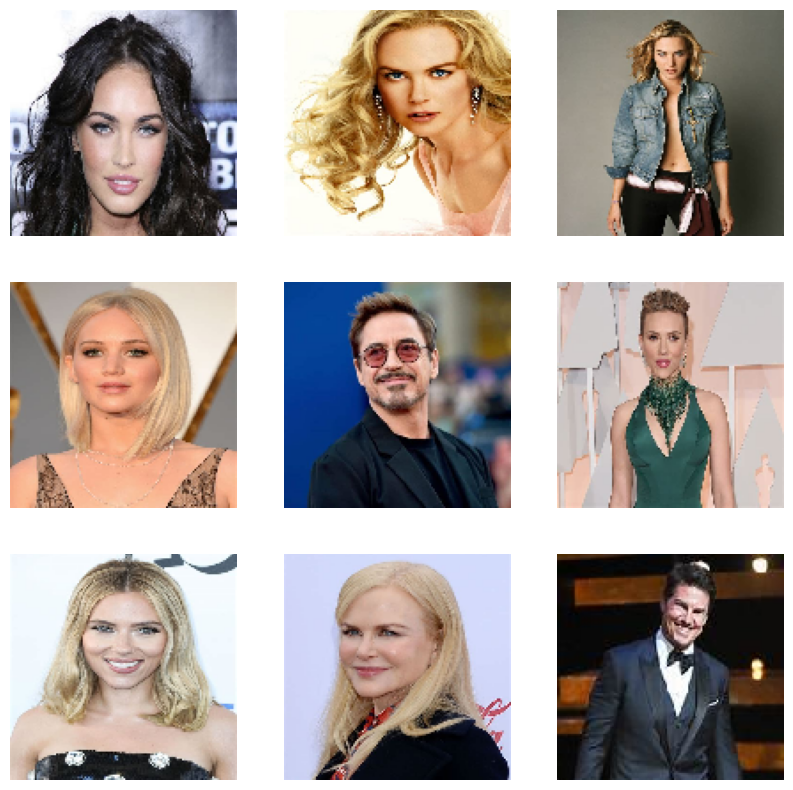

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with desired preprocessing options
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values to [0, 1]
    validation_split=0.2  # Split the data into training and validation sets
)

# Load and preprocess the images from a directory
image_dir = '/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset'
image_shape = (128,128)  # Specify the desired image size
batch_size = 128 #32or128

train_generator = datagen.flow_from_directory(
    image_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode=None,
    subset='training'
)

# Display some preprocessed images
images = next(train_generator)  # Get a batch of preprocessed images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3,3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

latent_dim = 100

generator = keras.Sequential([
    layers.Dense(8*8*256, input_dim=latent_dim),
    layers.Reshape((8,8,256)),

    layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same',use_bias=False),
    #layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.2),

    layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same',use_bias=False),
    #layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.2),

    
    
    layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same',use_bias=False),
    layers.LeakyReLU(alpha=0.2),

    layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='tanh')

])



In [4]:
generator.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 16384)             1654784   


 reshape (Reshape)           (None, 8, 8, 256)         0         


 conv2d_transpose (Conv2DTra  (None, 16, 16, 256)      1638400   


 nspose)                                                         


 leaky_re_lu (LeakyReLU)     (None, 16, 16, 256)       0         


 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 128)      819200    


 ranspose)                                                       


 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 128)       0         


 conv2d_transpose_2 (Conv2DT  (None, 64, 64, 64)       204800    


 ranspose)                                                       


 leaky_re_lu_2 (LeakyReLU)   (None, 64, 64, 64)        0         


 conv2d_transpose_3 (Conv2DT  (None, 128, 128, 3)      4803      


 ranspose)                                                       


Total params: 4,321,987


Trainable params: 4,321,987


Non-trainable params: 0


_________________________________________________________________


In [5]:
from tensorflow import keras
from tensorflow.keras import layers

discriminator = keras.Sequential([
    layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same', input_shape=(128, 128, 3)),
    layers.LeakyReLU(alpha=0.2),
    

    layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'),
    layers.LeakyReLU(alpha=0.2),
    #layers.Dropout(0.2),

    layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'),
    layers.LeakyReLU(alpha=0.2),
    #layers.BatchNormalization(),
    #layers.Dropout(0.2),
    
    
    
    layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'),
    layers.LeakyReLU(alpha=0.2),
    #layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])


In [6]:
#for layer in discriminator.layers:
 #   print(layer.name, layer.input_shape, layer.output_shape)


In [7]:
discriminator.summary()

Model: "sequential_1"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 64, 64, 256)       12544     


 leaky_re_lu_3 (LeakyReLU)   (None, 64, 64, 256)       0         


 conv2d_1 (Conv2D)           (None, 32, 32, 128)       524416    


 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 128)       0         


 conv2d_2 (Conv2D)           (None, 16, 16, 128)       262272    


 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         


 conv2d_3 (Conv2D)           (None, 8, 8, 128)         262272    


 leaky_re_lu_6 (LeakyReLU)   (None, 8, 8, 128)         0         


 flatten (Flatten)           (None, 8192)              0         


 dense_1 (Dense)             (None, 1)                 8193      


Total params: 1,069,697


Trainable params: 1,069,697


Non-trainable params: 0


_________________________________________________________________


In [8]:

discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
discriminator.trainable = False

# Define the GAN
gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.Model(gan_input, gan_output)


# Compile the GAN
gan.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
            loss='binary_crossentropy')
gan.summary()


Model: "model"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 100)]             0         


 sequential (Sequential)     (None, 128, 128, 3)       4321987   


 sequential_1 (Sequential)   (None, 1)                 1069697   


Total params: 5,391,684


Trainable params: 4,321,987


Non-trainable params: 1,069,697


_________________________________________________________________


In [9]:
epochs = 4500

# Calculate the steps per epoch
steps_per_epoch = images.shape[0] // batch_size

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        # Train the discriminator
        
        random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))
        generated_images = generator.predict(random_latent_vectors)
        real_images = images[np.random.randint(0, images.shape[0], size=batch_size)]
        generated_images_resized = tf.image.resize(generated_images, (128, 128))  
        real_images_resized = tf.image.resize(real_images, (128, 128))
        combined_images = np.concatenate([generated_images_resized, real_images_resized])
        
        labels = np.concatenate([np.zeros((batch_size, 1)), np.ones((batch_size, 1))])
        labels += 0.05 * np.random.random(labels.shape)#-0.025

        discriminator.trainable = True
        discriminator.train_on_batch(combined_images, labels)
        
        # Train the generator
        random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))
        misleading_targets = np.ones((batch_size, 1))
        
        discriminator.trainable = False
        gan.train_on_batch(random_latent_vectors, misleading_targets)
    if epoch % 10 == 0:
        print(f"Epoch:{epoch}/{epochs}")
        gan.evaluate(random_latent_vectors,misleading_targets)


import matplotlib.pyplot as plt

random_latent_vectors = np.random.normal(size=(10, latent_dim))
generated_images = generator.predict(random_latent_vectors)

# Rescale to [0, 1]
generated_images = 0.5 * generated_images + 0.5

# Plot the generated images
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
count = 0
for i in range(2):
    for j in range(5):
        if count < 10:
            axs[i, j].imshow(generated_images[count], cmap='gray')
            axs[i, j].axis('off')
            count += 1
        else:
            break

plt.tight_layout()
plt.show()

1/4 [======>.......................] - ETA: 19s

4/4 [==============================] - 7s 10ms/step


Epoch:0/4500


1/4 [======>.......................] - ETA: 1s - loss: 0.6912

3/4 [=====================>........] - ETA: 0s - loss: 0.6913

4/4 [==============================] - 1s 27ms/step - loss: 0.6913


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 11ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:10/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.6046

3/4 [=====================>........] - ETA: 0s - loss: 0.6054

4/4 [==============================] - 0s 28ms/step - loss: 0.6051


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 11ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:20/4500
1/4 [======>.......................] - ETA: 0s - loss: 1.1158

3/4 [=====================>........] - ETA: 0s - loss: 1.1112

4/4 [==============================] - 0s 29ms/step - loss: 1.1220


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:30/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7346

3/4 [=====================>........] - ETA: 0s - loss: 0.7440

4/4 [==============================] - 0s 29ms/step - loss: 0.7409


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:40/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.3383

3/4 [=====================>........] - ETA: 0s - loss: 0.3261

4/4 [==============================] - 0s 29ms/step - loss: 0.3249


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 13ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 11ms/step


Epoch:50/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.5551

3/4 [=====================>........] - ETA: 0s - loss: 0.5634

4/4 [==============================] - 0s 30ms/step - loss: 0.5727


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:60/4500
1/4 [======>.......................] - ETA: 0s - loss: 1.8082

3/4 [=====================>........] - ETA: 0s - loss: 1.9194

4/4 [==============================] - 0s 31ms/step - loss: 1.8691


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:70/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.9879

3/4 [=====================>........] - ETA: 0s - loss: 1.0145

4/4 [==============================] - 0s 31ms/step - loss: 1.0159


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 14ms/step


Epoch:80/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.8226

3/4 [=====================>........] - ETA: 0s - loss: 0.8322

4/4 [==============================] - 0s 31ms/step - loss: 0.8200


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:90/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.9768

3/4 [=====================>........] - ETA: 0s - loss: 1.0559

4/4 [==============================] - 0s 32ms/step - loss: 1.0427


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:100/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7528

3/4 [=====================>........] - ETA: 0s - loss: 0.7297

4/4 [==============================] - 0s 32ms/step - loss: 0.7311


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 13ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:110/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.8541

3/4 [=====================>........] - ETA: 0s - loss: 0.8524

4/4 [==============================] - 0s 33ms/step - loss: 0.8519


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:120/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.8693

3/4 [=====================>........] - ETA: 0s - loss: 0.8576

4/4 [==============================] - 0s 31ms/step - loss: 0.8559


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:130/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.9393

3/4 [=====================>........] - ETA: 0s - loss: 0.8734

4/4 [==============================] - 0s 30ms/step - loss: 0.8840


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:140/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.8769

3/4 [=====================>........] - ETA: 0s - loss: 0.8852

4/4 [==============================] - 0s 30ms/step - loss: 0.8809


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 11ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:150/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7431

3/4 [=====================>........] - ETA: 0s - loss: 0.7628

4/4 [==============================] - 0s 31ms/step - loss: 0.7642


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:160/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.9254

3/4 [=====================>........] - ETA: 0s - loss: 0.9180

4/4 [==============================] - 0s 31ms/step - loss: 0.9040


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:170/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7077

3/4 [=====================>........] - ETA: 0s - loss: 0.7278

4/4 [==============================] - 0s 31ms/step - loss: 0.7276


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 13ms/step


Epoch:180/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.2523

3/4 [=====================>........] - ETA: 0s - loss: 0.2472

4/4 [==============================] - 0s 31ms/step - loss: 0.2422


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:190/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7432

3/4 [=====================>........] - ETA: 0s - loss: 0.7529

4/4 [==============================] - 0s 31ms/step - loss: 0.7489


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:200/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.6398

3/4 [=====================>........] - ETA: 0s - loss: 0.6785

4/4 [==============================] - 0s 31ms/step - loss: 0.6670


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:210/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.6532

3/4 [=====================>........] - ETA: 0s - loss: 0.6635

4/4 [==============================] - 0s 30ms/step - loss: 0.6703


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:220/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7855

3/4 [=====================>........] - ETA: 0s - loss: 0.7982

4/4 [==============================] - 0s 31ms/step - loss: 0.7869


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:230/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7493

3/4 [=====================>........] - ETA: 0s - loss: 0.7706

4/4 [==============================] - 0s 31ms/step - loss: 0.7732


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:240/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7242

3/4 [=====================>........] - ETA: 0s - loss: 0.7779

4/4 [==============================] - 0s 31ms/step - loss: 0.7749


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:250/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.5769

3/4 [=====================>........] - ETA: 0s - loss: 0.5931

4/4 [==============================] - 0s 31ms/step - loss: 0.5949


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:260/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7225

3/4 [=====================>........] - ETA: 0s - loss: 0.7406

4/4 [==============================] - 0s 31ms/step - loss: 0.7373


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:270/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.8222

3/4 [=====================>........] - ETA: 0s - loss: 0.8183

4/4 [==============================] - 0s 30ms/step - loss: 0.8267


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:280/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.6925

3/4 [=====================>........] - ETA: 0s - loss: 0.6884

4/4 [==============================] - 0s 31ms/step - loss: 0.6917


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:290/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.8610

3/4 [=====================>........] - ETA: 0s - loss: 0.8420

4/4 [==============================] - 0s 31ms/step - loss: 0.8419


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:300/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.8229

3/4 [=====================>........] - ETA: 0s - loss: 0.8256

4/4 [==============================] - 0s 31ms/step - loss: 0.8263


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:310/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.8243

3/4 [=====================>........] - ETA: 0s - loss: 0.8531

4/4 [==============================] - 0s 31ms/step - loss: 0.8778


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:320/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.8214

3/4 [=====================>........] - ETA: 0s - loss: 0.8350

4/4 [==============================] - 0s 31ms/step - loss: 0.8379


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:330/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7204

3/4 [=====================>........] - ETA: 0s - loss: 0.7142

4/4 [==============================] - 0s 33ms/step - loss: 0.7131


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 11ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:340/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.9269

3/4 [=====================>........] - ETA: 0s - loss: 0.9360

4/4 [==============================] - 0s 31ms/step - loss: 0.9416


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 13ms/step


Epoch:350/4500
1/4 [======>.......................] - ETA: 0s - loss: 1.0160

3/4 [=====================>........] - ETA: 0s - loss: 0.9599

4/4 [==============================] - 0s 31ms/step - loss: 0.9708


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 15ms/step


Epoch:360/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7535

3/4 [=====================>........] - ETA: 0s - loss: 0.7740

4/4 [==============================] - 0s 31ms/step - loss: 0.7653


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:370/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7335

3/4 [=====================>........] - ETA: 0s - loss: 0.7416

4/4 [==============================] - 0s 31ms/step - loss: 0.7287


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:380/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.6275

3/4 [=====================>........] - ETA: 0s - loss: 0.6342

4/4 [==============================] - 0s 31ms/step - loss: 0.6285


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:390/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7639

3/4 [=====================>........] - ETA: 0s - loss: 0.7345

4/4 [==============================] - 0s 31ms/step - loss: 0.7352


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 14ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:400/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.5620

3/4 [=====================>........] - ETA: 0s - loss: 0.5943

4/4 [==============================] - 0s 31ms/step - loss: 0.5926


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:410/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7838

3/4 [=====================>........] - ETA: 0s - loss: 0.7945

4/4 [==============================] - 0s 32ms/step - loss: 0.8028


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:420/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7381

3/4 [=====================>........] - ETA: 0s - loss: 0.7562

4/4 [==============================] - 0s 31ms/step - loss: 0.7654


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:430/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.4081

3/4 [=====================>........] - ETA: 0s - loss: 0.4119

4/4 [==============================] - 0s 31ms/step - loss: 0.4087


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:440/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7084

3/4 [=====================>........] - ETA: 0s - loss: 0.6708

4/4 [==============================] - 0s 31ms/step - loss: 0.6749


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:450/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.6787

3/4 [=====================>........] - ETA: 0s - loss: 0.6302

4/4 [==============================] - 0s 31ms/step - loss: 0.6274


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 16ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:460/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.8169

3/4 [=====================>........] - ETA: 0s - loss: 0.8495

4/4 [==============================] - 0s 31ms/step - loss: 0.8404


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 13ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:470/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7432

3/4 [=====================>........] - ETA: 0s - loss: 0.7568

4/4 [==============================] - 0s 32ms/step - loss: 0.7593


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 13ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:480/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.6472

3/4 [=====================>........] - ETA: 0s - loss: 0.6252

4/4 [==============================] - 0s 31ms/step - loss: 0.6286


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 13ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:490/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.4426

3/4 [=====================>........] - ETA: 0s - loss: 0.4089

4/4 [==============================] - 0s 31ms/step - loss: 0.4160


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:500/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7445

3/4 [=====================>........] - ETA: 0s - loss: 0.7570

4/4 [==============================] - 0s 31ms/step - loss: 0.7643


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:510/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.6830

3/4 [=====================>........] - ETA: 0s - loss: 0.7068

4/4 [==============================] - 0s 31ms/step - loss: 0.7075


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:520/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7715

3/4 [=====================>........] - ETA: 0s - loss: 0.7559

4/4 [==============================] - 0s 31ms/step - loss: 0.7418


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:530/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.6086

3/4 [=====================>........] - ETA: 0s - loss: 0.5888

4/4 [==============================] - 0s 31ms/step - loss: 0.5944


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:540/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.7161

3/4 [=====================>........] - ETA: 0s - loss: 0.7208

4/4 [==============================] - 0s 32ms/step - loss: 0.7154


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


Epoch:550/4500
1/4 [======>.......................] - ETA: 0s - loss: 0.8650

3/4 [=====================>........] - ETA: 0s - loss: 0.8320

4/4 [==============================] - 0s 31ms/step - loss: 0.8388


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 12ms/step


1/4 [======>.......................] - ETA: 0s

In [ ]:
gan.save('dcgan_model.h5')

In [ ]:
import tensorflow as tf

# Load or define your model
model = tf.keras.models.load_model('dc_model.h5')

# Define the optimizer
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

# Compile the model with the legacy optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
